<a href="https://colab.research.google.com/github/Inaracrewc/RF_Walmart_sales_prediction/blob/main/RF_Walmart_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 18.0MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 194kB 59.1MB/s 
     |████████████████████████████████| 1.2MB 59.7MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
Mounted at /content/gdrive


In [ ]:
#historical training data, which covers to 2010-02-05 to 2012-11-01. 
#My model gives a mean on the total week days and weeks in a month and is more accurate on monthly scale, not daily or weekly
#goal is to predict sales from November 2012 until July 2013 

In [ ]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

In [ ]:
import numpy as np
import os
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [ ]:
path = '/content/drive/MyDrive/walmart-recruiting-store-sales-forecasting'

In [ ]:
test = pd.read_csv("/content/gdrive/MyDrive/walmart-recruiting-store-sales-forecasting/test.csv.zip")

In [ ]:
train = pd.read_csv("/content/gdrive/MyDrive/walmart-recruiting-store-sales-forecasting/train.csv.zip")

In [ ]:
stores = pd.read_csv('/content/gdrive/MyDrive/walmart-recruiting-store-sales-forecasting/stores.csv')

In [ ]:
features = pd.read_csv('/content/gdrive/MyDrive/walmart-recruiting-store-sales-forecasting/features.csv.zip')

In [ ]:
sample = pd.read_csv('/content/gdrive/MyDrive/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [ ]:
print(train.shape)
train.head()

(421570, 6)


,Store,Dept,Date,Weekly_Sales,IsHoliday,dataset
0,1,1,2010-02-05,24924.50,False,train
1,1,1,2010-02-12,46039.49,True,train
2,1,1,2010-02-19,41595.55,False,train
3,1,1,2010-02-26,19403.54,False,train
4,1,1,2010-03-05,21827.90,False,train


In [ ]:
print(test.shape)
test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
print(sample.shape)
sample.head()

(115064, 2)


,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
train2=train.drop(['Weekly_Sales','Date'], axis=1)   #Randomly choose a subset of columns of your data
train2

,Store,Dept,IsHoliday
0,1,1,False
1,1,1,True
2,1,1,False
3,1,1,False
4,1,1,False
...,...,...,...
421565,45,98,False
421566,45,98,False
421567,45,98,False
421568,45,98,False


In [ ]:
test2=test.drop(['Date'], axis=1)
test2

,Store,Dept,IsHoliday
0,1,1,False
1,1,1,False
2,1,1,False
3,1,1,True
4,1,1,False
...,...,...,...
115059,45,98,False
115060,45,98,False
115061,45,98,False
115062,45,98,False


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train2, train['Weekly_Sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
result1=rf.predict(test2)
result1

array([22158.9089093 , 22158.9089093 , 22158.9089093 , ...,   569.82276962,   569.82276962,   569.82276962])

In [ ]:
test['Weekly_Sales']=result1
test.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,22158.908909
1,1,1,2012-11-09,False,22158.908909
2,1,1,2012-11-16,False,22158.908909
3,1,1,2012-11-23,True,25604.800896
4,1,1,2012-11-30,False,22158.908909


In [ ]:
sample['Weekly_Sales'] = result1
sample

,Id,Weekly_Sales
0,1_1_2012-11-02,22158.908909
1,1_1_2012-11-09,22158.908909
2,1_1_2012-11-16,22158.908909
3,1_1_2012-11-23,25604.800896
4,1_1_2012-11-30,22158.908909
...,...,...
115059,45_98_2013-06-28,569.822770
115060,45_98_2013-07-05,569.822770
115061,45_98_2013-07-12,569.822770
115062,45_98_2013-07-19,569.822770


In [ ]:
print(result1)
sample.head()

[22158.9089093  22158.9089093  22158.9089093  ...   569.82276962   569.82276962   569.82276962]


,Id,Weekly_Sales
0,1_1_2012-11-02,22158.908909
1,1_1_2012-11-09,22158.908909
2,1_1_2012-11-16,22158.908909
3,1_1_2012-11-23,25604.800896
4,1_1_2012-11-30,22158.908909


In [ ]:
sample.to_csv('weekly_sales_without_hol.csv', index=1)


In [ ]:
pd.read_csv('weekly_sales_without_hol.csv')

,Unnamed: 0,Id,Weekly_Sales
0,0,1_1_2012-11-02,22158.908909
1,1,1_1_2012-11-09,22158.908909
2,2,1_1_2012-11-16,22158.908909
3,3,1_1_2012-11-23,25604.800896
4,4,1_1_2012-11-30,22158.908909
...,...,...,...
115059,115059,45_98_2013-06-28,569.822770
115060,115060,45_98_2013-07-05,569.822770
115061,115061,45_98_2013-07-12,569.822770
115062,115062,45_98_2013-07-19,569.822770


In [ ]:
pd.set_option("min_rows", 50)
sample

,Id,Weekly_Sales
0,1_1_2012-11-02,22158.908909
1,1_1_2012-11-09,22158.908909
2,1_1_2012-11-16,22158.908909
3,1_1_2012-11-23,25604.800896
4,1_1_2012-11-30,22158.908909
5,1_1_2012-12-07,22158.908909
6,1_1_2012-12-14,22158.908909
7,1_1_2012-12-21,22158.908909
8,1_1_2012-12-28,25604.800896
9,1_1_2013-01-04,22158.908909


In [ ]:
#import matplotlib.pyplot as plt

In [ ]:
#train['dataset'] = 'train'
#test['dataset'] = 'test'
train_test = pd.concat([train, test])

# Merge all data
train_test = train_test.merge(stores, how='left').merge(features, how='left')

# Creating date-time objects and some extra date-time info
train_test['Date'] = pd.to_datetime(train_test['Date'])
train_test['Year'] = pd.to_datetime(train_test['Date']).dt.year
train_test['Month'] = pd.to_datetime(train_test['Date']).dt.month
train_test['Week'] = pd.to_datetime(train_test['Date']).dt.week
train_test['DayOfTheMonth'] = pd.to_datetime(train_test['Date']).dt.day

train_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if sys.path[0] == '':


,Store,Dept,Date,Weekly_Sales,IsHoliday,dataset,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
0,1,1,2010-02-05,24924.50,False,train,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,train,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,train,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,train,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,train,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,2010,3,9,5


In [ ]:
pd.DataFrame(train_test.dtypes).reset_index().rename(columns={'index':'Columns', 0:'Type'})

,Columns,Type
0,Store,int64
1,Dept,int64
2,Date,datetime64[ns]
3,Weekly_Sales,float64
4,IsHoliday,bool
5,dataset,object
6,Type,object
7,Size,int64
8,Temperature,float64
9,Fuel_Price,float64


In [ ]:
# all numeric columns
numeric = train_test.select_dtypes(include=['number']).copy()

# discrete number columns for bar-graphs
disc_num_var = ['Year','Month','Week','DayOfTheMonth']

# continious number columns for histograms
cont_num_var = []
for i in numeric:
    if i not in disc_num_var:
        cont_num_var.append(i)
        
print('Discrete:', disc_num_var)
print('Continious:', cont_num_var)

Discrete: ['Year', 'Month', 'Week', 'DayOfTheMonth']
Continious: ['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']


In [ ]:
numeric.shape

(536634, 17)

In [ ]:
numeric = numeric.drop(["MarkDown2","MarkDown3","MarkDown4","MarkDown5"], axis='columns')

In [ ]:
numeric.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfTheMonth
0,1,1,24924.50,151315,42.31,2.572,211.096358,8.106,2010,2,5,5
1,1,1,46039.49,151315,38.51,2.548,211.242170,8.106,2010,2,6,12
2,1,1,41595.55,151315,39.93,2.514,211.289143,8.106,2010,2,7,19
3,1,1,19403.54,151315,46.63,2.561,211.319643,8.106,2010,2,8,26
4,1,1,21827.90,151315,46.50,2.625,211.350143,8.106,2010,3,9,5


In [ ]:
# all categorical columns
categoric = train_test.select_dtypes(exclude=['number']).drop(['Date', 'dataset'], axis=1).copy()
categoric.columns

Index(['IsHoliday', 'Type'], dtype='object')

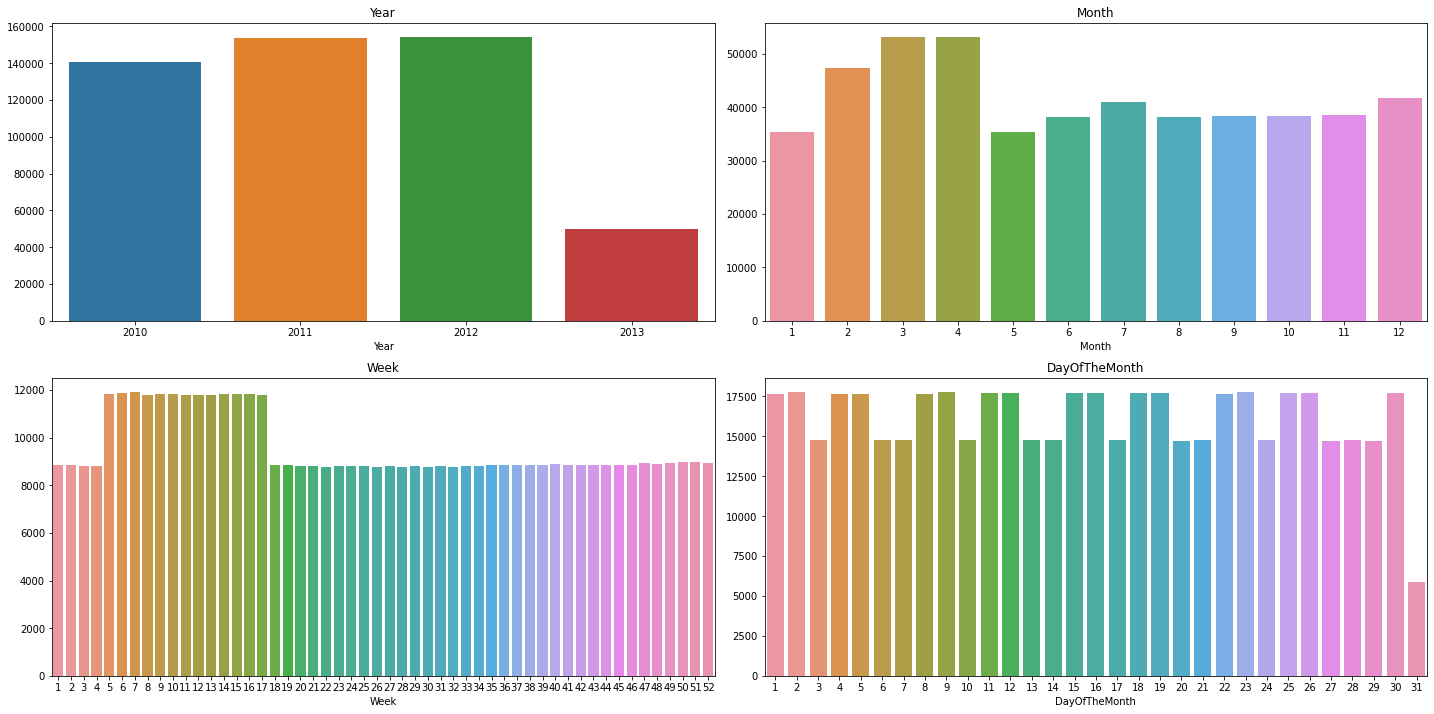

In [ ]:
fig = plt.figure(figsize=(20,10))

for index, col in enumerate(disc_num_var):
    plt.subplot(2, 2, index+1)
    sns.countplot(x=col, data=numeric.dropna()) 
    plt.ylabel(None)
    plt.title(col)
fig.tight_layout(pad=1.0)